In [49]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional

from gensim.models import Word2Vec

from keras.callbacks import EarlyStopping
from keras.models import load_model

time: 15 ms (started: 2023-04-15 14:16:08 +02:00)


In [50]:
!pip install contractions

time: 7.78 s (started: 2023-04-15 14:16:08 +02:00)


In [51]:
!pip install tensorflow==2.12.*


time: 6.08 s (started: 2023-04-15 14:16:16 +02:00)


In [52]:
!pip install tweet-preprocessor 

time: 6.53 s (started: 2023-04-15 14:16:22 +02:00)


In [53]:
!pip install emoji

time: 5.91 s (started: 2023-04-15 14:16:28 +02:00)


In [54]:
import preprocessor as p
import numpy as np 
import pandas as pd 
import emoji
import keras

import tensorflow as tf
from keras.models import Sequential



#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#from keras.layers.recurrent import LSTM, GRU,SimpleRNN 
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional,SimpleRNN

from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.embeddings import Embedding

#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint



from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
#import transformers
#from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
#from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tqdm import tqdm

time: 1.25 s (started: 2023-04-15 14:16:34 +02:00)


In [55]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

time: 16 ms (started: 2023-04-15 14:16:36 +02:00)


In [56]:
import warnings
warnings.filterwarnings('ignore')

time: 0 ns (started: 2023-04-15 14:16:36 +02:00)


In [57]:
## Save clean_df to csv file
#clean_df.to_csv('clean_df.csv', index=False)
Tweet_Dataset_model = pd.read_csv('Model_data.csv')

time: 594 ms (started: 2023-04-15 14:16:36 +02:00)


In [58]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']"
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']"


time: 16 ms (started: 2023-04-15 14:16:36 +02:00)


In [59]:
Tweet_Dataset_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108628 entries, 0 to 108627
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tweet_id           8356 non-null    float64
 1   sentiment          108628 non-null  object 
 2   content            108628 non-null  object 
 3   content_token      8356 non-null    object 
 4   synonym            8356 non-null    object 
 5   clean_tweet        108321 non-null  object 
 6   clean_tweet_token  108628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.8+ MB
time: 125 ms (started: 2023-04-15 14:16:36 +02:00)


In [60]:
Tweet_Dataset_model.isnull().sum()

tweet_id             100272
sentiment                 0
content                   0
content_token        100272
synonym              100272
clean_tweet             307
clean_tweet_token         0
dtype: int64

time: 109 ms (started: 2023-04-15 14:16:36 +02:00)


In [61]:
Tweet_Dataset_model = Tweet_Dataset_model[Tweet_Dataset_model['clean_tweet'].notna()]

time: 16 ms (started: 2023-04-15 14:16:36 +02:00)


In [62]:
Tweet_Dataset_model["sentiment"].value_counts()

boredom       8356
anger         8356
happiness     8349
love          8347
fun           8347
sadness       8346
relief        8346
enthusiasm    8340
hate          8337
worry         8331
surprise      8324
empty         8272
neutral       8270
Name: sentiment, dtype: int64

time: 16 ms (started: 2023-04-15 14:16:37 +02:00)


In [63]:
sent_to_id  = {"empty":0, "sadness":1,"enthusiasm":2,"neutral":3,"worry":4,
                        "surprise":5,"love":6,"fun":7,"hate":8,"happiness":9,"boredom":10,"relief":11,"anger":12}

time: 0 ns (started: 2023-04-15 14:16:37 +02:00)


In [64]:
Tweet_Dataset_model["sentiment_id"] = Tweet_Dataset_model['sentiment'].map(sent_to_id)

time: 16 ms (started: 2023-04-15 14:16:37 +02:00)


In [65]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3


time: 16 ms (started: 2023-04-15 14:16:37 +02:00)


In [68]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 435.4 kB/s eta 0:00:00
time: 9.19 s (started: 2023-04-15 14:18:59 +02:00)


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

time: 31 ms (started: 2023-04-15 14:19:11 +02:00)


In [70]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

time: 0 ns (started: 2023-04-15 14:19:12 +02:00)


In [71]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(Tweet_Dataset_model['clean_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('quot', 5405),
 ('good', 4375),
 ('number', 4356),
 ('im', 4227),
 ('lol', 4209),
 ('know', 4121),
 ('atomic', 4073),
 ('today', 3723),
 ('like', 3519),
 ('time', 3510)]

time: 500 ms (started: 2023-04-15 14:19:13 +02:00)


In [72]:
data=Tweet_Dataset_model

time: 0 ns (started: 2023-04-15 14:19:14 +02:00)


In [73]:
data

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3
...,...,...,...,...,...,...,...,...
108623,NaN,anger,Did a historic Jesus of_all_time exist? Im wi...,NaN,NaN,historic jesus time exist im witness hard prov...,"['historic', 'jesus', 'time', 'exist', 'im', '...",12
108624,NaN,anger,@mikeavila ack! I just interpret about your t...,NaN,NaN,ack interpret testify horrible accounting taste,"['ack', 'interpret', 'testify', 'horrible', 'a...",12
108625,NaN,anger,ne'er does anything dear cultivate and lapin ...,NaN,NaN,ne er anything dear cultivate lapin life histo...,"['ne', 'er', 'anything', 'dear', 'cultivate', ...",12
108626,NaN,anger,@mashable Link to ff &quot;how it works&quot;...,NaN,NaN,link ff quot work quot broke,"['link', 'ff', 'quot', 'work', 'quot', 'broke']",12


time: 31 ms (started: 2023-04-15 14:19:15 +02:00)


In [74]:
# removing usernames from tweet

data['new_tweet'] = data.content.str.replace('@', '')
data.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id,new_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3,dannycastillo We want to trade with someone wh...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3,cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3,No Topic Maps talks at the Balisage Markup Con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3,cynthia_123 i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3,I missed the bl***y bus!!!!!!!!


time: 110 ms (started: 2023-04-15 14:19:15 +02:00)


In [75]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
data.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id,new_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3,dannycastillo We want to trade with someone wh...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3,cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3,No Topic Maps talks at the Balisage Markup Con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3,cynthia i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3,I missed the bl y bus


time: 844 ms (started: 2023-04-15 14:19:18 +02:00)


In [76]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('i', 55843),
 ('to', 41045),
 ('the', 38473),
 ('a', 29493),
 ('it', 22759),
 ('my', 22266),
 ('and', 22028),
 ('you', 20463),
 ('is', 16622),
 ('for', 15887)]

time: 1.02 s (started: 2023-04-15 14:19:19 +02:00)


In [77]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id,new_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3,"[dannycastillo, We, want, to, trade, with, som..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3,"[cant, fall, asleep]"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3,"[No, Topic, Maps, talks, at, the, Balisage, Ma..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3,"[cynthia, i, cant, sleep]"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3,"[I, missed, the, bl, y, bus]"


time: 1.27 s (started: 2023-04-15 14:19:20 +02:00)


In [78]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id,new_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3,"[dannycastillo, we, want, to, trade, with, som..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3,"[cant, fall, asleep]"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3,"[no, topic, map, talk, at, the, balisag, marku..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3,"[cynthia, i, cant, sleep]"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3,"[i, miss, the, bl, y, bus]"


time: 25.5 s (started: 2023-04-15 14:19:21 +02:00)


In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

time: 1.11 s (started: 2023-04-15 14:19:47 +02:00)


In [80]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

time: 0 ns (started: 2023-04-15 14:19:48 +02:00)


In [81]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

time: 0 ns (started: 2023-04-15 14:19:50 +02:00)


In [82]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

time: 0 ns (started: 2023-04-15 14:19:51 +02:00)


In [83]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id,new_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3,"[ticket, houston, dannycastillo, want, someon,..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3,"[cant, fall, asleep]"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3,"[topicmap, map, balisag, topic, ml, http, tr, ..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3,"[cant, cynthia, sleep]"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3,"[miss, bl, bus]"


time: 7.19 s (started: 2023-04-15 14:19:52 +02:00)


In [84]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head() 

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id,new_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3,ticket houston dannycastillo want someon trade
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3,cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3,topicmap map balisag topic ml http tr talk con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3,cant cynthia sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3,miss bl bus


time: 438 ms (started: 2023-04-15 14:19:59 +02:00)


In [85]:
#Bag of words

time: 0 ns (started: 2023-04-15 14:20:02 +02:00)


In [86]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["sentiment_id"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (86656,) (86656,)
testing set : (21665,) (21665,)
time: 16 ms (started: 2023-04-15 14:20:02 +02:00)


In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

time: 0 ns (started: 2023-04-15 14:20:05 +02:00)


In [88]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(86656, 39910)
(86656, 39910)
time: 1.58 s (started: 2023-04-15 14:20:06 +02:00)


In [89]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(21665, 39910)
(21665, 39910)
time: 422 ms (started: 2023-04-15 14:20:09 +02:00)


# Model building  Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

time: 34min 48s (started: 2023-04-15 14:20:12 +02:00)


In [91]:
predictions = model.predict(x_test_tfidf)

time: 9 s (started: 2023-04-15 14:55:00 +02:00)


In [92]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

71.34087237479805

time: 0 ns (started: 2023-04-15 14:55:09 +02:00)


In [93]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[1552,   10,    9,   31,   15,   18,    8,    4,   19,    5,   18,
          17,    2],
       [  36,  698,   11,  250,  261,   51,   58,   57,   84,   84,   31,
          38,    5],
       [  20,    9, 1490,   23,   10,   14,    7,   15,    7,   17,    1,
          13,    4],
       [  42,  134,   31,  711,  273,   56,  104,   49,   30,  180,   14,
          58,    5],
       [  24,  266,   19,  430,  503,   57,   85,   48,   54,  159,   13,
          30,    3],
       [  39,   56,    7,  103,   80, 1248,   51,   39,   30,   60,    4,
          27,    0],
       [  26,   38,   13,  108,   51,   56, 1140,   41,   33,  146,    3,
          35,    2],
       [  17,   23,   13,   79,   36,   31,   47, 1345,   13,   40,    4,
          26,    2],
       [  15,   26,   10,   52,   36,   30,   14,   19, 1389,   13,    4,
          21,    0],
       [  29,   50,   22,  237,   87,   50,  171,   89,   17,  832,    6,
          53,    2],
       [   5,    5,    1,    4,    1,    0,    0, 

time: 15 ms (started: 2023-04-15 14:55:09 +02:00)


In [94]:
predictions

array([ 5, 12, 10, ..., 10,  7,  0], dtype=int64)

time: 0 ns (started: 2023-04-15 14:56:47 +02:00)


In [135]:
## Save clean_df to csv file
#clean_df.to_csv('clean_df.csv', index=False)
movie_predict = pd.read_csv('Movie_df_model.csv')

time: 937 ms (started: 2023-04-15 15:32:12 +02:00)


In [136]:
movie_predict

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go
...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...


time: 16 ms (started: 2023-04-15 15:32:13 +02:00)


In [137]:
movie_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                304713 non-null  object
 1   text              304446 non-null  object
 2   speaker           304713 non-null  object
 3   reply_to          221616 non-null  object
 4   conversation_id   304713 non-null  object
 5   meta.movie_id     304713 non-null  object
 6   text_movie_token  304713 non-null  object
 7   clean_text        304446 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB
time: 296 ms (started: 2023-04-15 15:32:15 +02:00)


In [138]:
movie_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                304713 non-null  object
 1   text              304446 non-null  object
 2   speaker           304713 non-null  object
 3   reply_to          221616 non-null  object
 4   conversation_id   304713 non-null  object
 5   meta.movie_id     304713 non-null  object
 6   text_movie_token  304713 non-null  object
 7   clean_text        304446 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB
time: 266 ms (started: 2023-04-15 15:32:16 +02:00)


In [139]:
movie_predict2 = movie_predict[movie_predict['text'].notna()]

time: 46 ms (started: 2023-04-15 15:32:18 +02:00)


In [140]:
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go
...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...


time: 15 ms (started: 2023-04-15 15:32:20 +02:00)


In [141]:
movie_predict2.isnull().sum()

id                      0
text                    0
speaker                 0
reply_to            83032
conversation_id         0
meta.movie_id           0
text_movie_token        0
clean_text              0
dtype: int64

time: 265 ms (started: 2023-04-15 15:32:22 +02:00)


In [142]:
x_pre_counts = count_vect.transform(movie_predict2["text"])
x_pre_tfidf = transformer.transform(x_pre_counts)

time: 2.7 s (started: 2023-04-15 15:32:26 +02:00)


In [143]:
predictions = model.predict(x_pre_tfidf)

time: 5min 23s (started: 2023-04-15 15:32:30 +02:00)


In [144]:
predictions

array([3, 3, 5, ..., 3, 9, 4], dtype=int64)

time: 16 ms (started: 2023-04-15 15:39:55 +02:00)


In [145]:
movie_predict2["emotion"]=predictions
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text,emotion
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3
...,...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,3
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9


time: 16 ms (started: 2023-04-15 15:39:58 +02:00)


In [146]:
sent_to_2  = {0:"empty", 1:"sadness", 2:"enthusiasm", 3:"neutral", 4:"worry", 5:"surprise", 6:"love",
              7:"fun", 8:"hate", 9:"happiness", 10:"boredom", 11:"relief", 12:"anger"}

time: 0 ns (started: 2023-04-15 15:40:04 +02:00)


In [147]:
movie_predict2["Emotion_text"] = movie_predict2['emotion'].map(sent_to_2)

time: 0 ns (started: 2023-04-15 15:40:06 +02:00)


In [148]:
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text,emotion,Emotion_text
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral
...,...,...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5,surprise
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3,neutral
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,3,neutral
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9,happiness


time: 15 ms (started: 2023-04-15 15:40:11 +02:00)


In [149]:
#Text Token column emotion prediction

time: 0 ns (started: 2023-04-15 15:40:18 +02:00)


In [150]:
x_pre_counts = count_vect.transform(movie_predict2["text_movie_token"])
x_pre_tfidf = transformer.transform(x_pre_counts)

time: 2.27 s (started: 2023-04-15 15:40:21 +02:00)


In [151]:
predictions2 = model.predict(x_pre_tfidf)

time: 4min 58s (started: 2023-04-15 15:40:23 +02:00)


In [152]:
predictions2

array([3, 3, 5, ..., 5, 9, 4], dtype=int64)

time: 16 ms (started: 2023-04-15 15:45:22 +02:00)


In [153]:
movie_predict2["emotion"]=predictions2
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text,emotion,Emotion_text
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral
...,...,...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5,surprise
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3,neutral
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,5,neutral
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9,happiness


time: 15 ms (started: 2023-04-15 15:45:39 +02:00)


In [154]:
sent_to_2  = {0:"empty", 1:"sadness", 2:"enthusiasm", 3:"neutral", 4:"worry", 5:"surprise", 6:"love",
              7:"fun", 8:"hate", 9:"happiness", 10:"boredom", 11:"relief", 12:"anger"}

time: 0 ns (started: 2023-04-15 15:45:50 +02:00)


In [155]:
movie_predict2["Emotion_text2"] = movie_predict2['emotion'].map(sent_to_2)

time: 0 ns (started: 2023-04-15 15:45:52 +02:00)


In [156]:
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5,surprise,surprise
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3,neutral,neutral
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,5,neutral,surprise
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9,happiness,happiness


time: 16 ms (started: 2023-04-15 15:46:03 +02:00)


In [157]:
movie_predict2.to_csv('movie_predict_emotion.csv', index=False)

time: 1.98 s (started: 2023-04-15 15:46:22 +02:00)


In [158]:
#clean_df.to_csv('clean_df.csv', index=False)
movie_predict2 = pd.read_csv('movie_predict_emotion.csv')

time: 1.09 s (started: 2023-04-15 15:46:29 +02:00)


In [159]:
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...
304441,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5,surprise,surprise
304442,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3,neutral,neutral
304443,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,5,neutral,surprise
304444,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9,happiness,happiness


time: 0 ns (started: 2023-04-15 15:46:31 +02:00)


In [160]:
#! pip install  spark-nlp==3.4.2 pyspark==3.2.0 ipython-autotime
#%load_ext autotime

time: 0 ns (started: 2023-04-15 15:46:35 +02:00)


In [161]:
movie_predict2

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...
304441,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5,surprise,surprise
304442,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3,neutral,neutral
304443,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,5,neutral,surprise
304444,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9,happiness,happiness


time: 16 ms (started: 2023-04-15 15:46:37 +02:00)


In [162]:
#df.rename({eski:yeni})

time: 0 ns (started: 2023-04-15 15:46:39 +02:00)


In [163]:
#movie  = {"meta.movie_id":"movieid"}

time: 0 ns (started: 2023-04-15 15:46:41 +02:00)


In [164]:
movie_predict2.rename(columns={"meta.movie_id":"movieid"},inplace=True)

time: 0 ns (started: 2023-04-15 15:46:42 +02:00)


In [165]:
movie_predict2

,id,text,speaker,reply_to,conversation_id,movieid,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...
304441,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...,5,surprise,surprise
304442,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...,3,neutral,neutral
304443,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker,5,neutral,surprise
304444,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...,9,happiness,happiness


time: 15 ms (started: 2023-04-15 15:46:46 +02:00)


In [166]:
#M0=(movie_predict2['movieid']='m0')

rslt_df = movie_predict2[(movie_predict2['movieid'] == 'm0')]

time: 16 ms (started: 2023-04-15 15:46:51 +02:00)


In [167]:
rslt_df 

,id,text,speaker,reply_to,conversation_id,movieid,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to,3,neutral,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise,surprise
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...
663,L191,Jesus! Can a man even grab a sandwich before ...,u11,NaN,L191,m0,"['jesus', 'man', 'even', 'grab', 'sandwich', '...",jesus can a man even grab a sandwich before ...,9,happiness,happiness
664,L171,Sarah Lawrence is on the other side of the cou...,u11,L170,L170,m0,"['sarah', 'lawrence', 'side', 'country']",sarah lawrence is on the other side of the cou...,3,neutral,neutral
665,L170,What's a synonym for throbbing?,u10,NaN,L170,m0,"['whats', 'synonym', 'throbbing']",what s a synonym for throbbing,3,neutral,neutral
666,L162,Make anyone cry today?,u11,L161,L161,m0,"['make', 'anyone', 'cry', 'today']",make anyone cry today,0,empty,empty


time: 0 ns (started: 2023-04-15 15:46:53 +02:00)


In [168]:
#M0=(movie_predict2['movieid']='m0')

speaker_df = rslt_df[(rslt_df['speaker'] == 'u0')]

time: 0 ns (started: 2023-04-15 15:46:55 +02:00)


In [169]:
speaker_df

,id,text,speaker,reply_to,conversation_id,movieid,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so,5,surprise,surprise
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
6,L872,Okay -- you're gonna need to learn how to lie.,u0,L871,L870,m0,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry,worry
8,L870,I'm kidding. You know how sometimes you just ...,u0,NaN,L870,m0,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,worry,neutral
...,...,...,...,...,...,...,...,...,...,...,...
184,L517,"Daddy, I --",u0,NaN,L517,m0,['daddy'],daddy i,3,neutral,neutral
186,L189,But she doesn't want to date.,u0,NaN,L189,m0,"['doesnt', 'want', 'date']",but she doesn t want to date,4,neutral,worry
187,L183,"But it's not fair -- she's a mutant, Daddy!",u0,L182,L179,m0,"['fair', 'shes', 'mutant', 'daddy']",but it s not fair she s a mutant daddy,2,sadness,enthusiasm
189,L181,What if she never starts dating?,u0,L180,L179,m0,"['never', 'start', 'dating']",what if she never starts dating,9,neutral,happiness


time: 31 ms (started: 2023-04-15 15:46:58 +02:00)


In [170]:
speaker_df["conversation_id"].value_counts()

L878     4
L893     4
L179     3
L1007    3
L909     3
        ..
L984     1
L756     1
L592     1
L589     1
L759     1
Name: conversation_id, Length: 65, dtype: int64

time: 16 ms (started: 2023-04-15 15:47:01 +02:00)


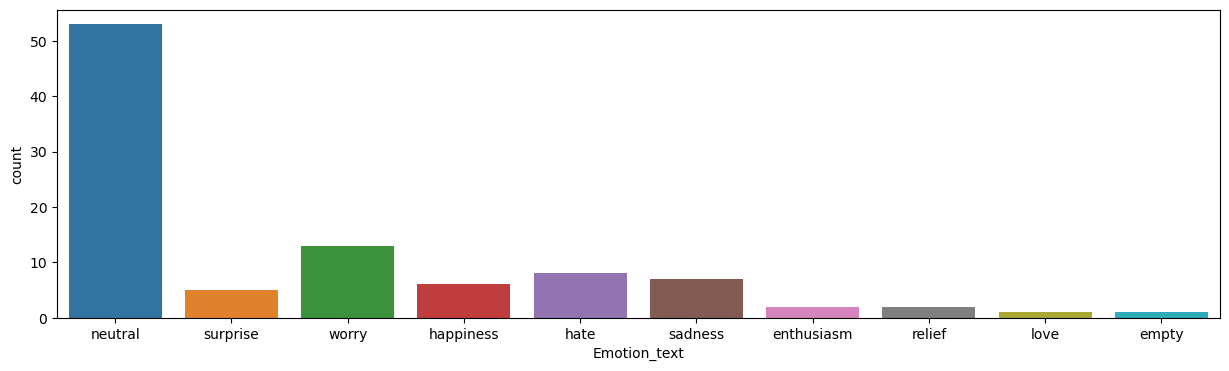

time: 234 ms (started: 2023-04-15 15:47:04 +02:00)


In [171]:
plt.figure(figsize=(15,4))
sns.countplot(x='Emotion_text', data=speaker_df);

In [172]:
speaker_df_neutral = speaker_df[(speaker_df['Emotion_text'] == 'neutral')]

time: 0 ns (started: 2023-04-15 15:47:09 +02:00)


In [173]:
speaker_df_neutral

,id,text,speaker,reply_to,conversation_id,movieid,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
14,L864,"Me. This endless ...blonde babble. I'm like, ...",u0,L863,L862,m0,"['endless', 'blonde', 'babble', 'im', 'like', ...",me this endless blonde babble i m like ...,3,neutral,neutral
20,L698,But,u0,L697,L696,m0,[],but,3,neutral,neutral
22,L696,"Well, no...",u0,NaN,L696,m0,['well'],well no,3,neutral,neutral
24,L694,I was?,u0,L693,L693,m0,[],i was,3,neutral,neutral
26,L663,Tons,u0,L662,L662,m0,['ton'],tons,3,neutral,neutral
31,L575,Hi.,u0,NaN,L575,m0,['hi'],hi,3,neutral,neutral
34,L405,Lesbian? No. I found a picture of Jared Leto ...,u0,L404,L404,m0,"['lesbian', 'found', 'picture', 'jared', 'leto...",lesbian no i found a picture of jared leto ...,3,neutral,neutral
39,L368,Eber's Deep Conditioner every two days. And I ...,u0,L367,L367,m0,"['ebers', 'deep', 'conditioner', 'every', 'two...",eber s deep conditioner every two days and i ...,3,neutral,neutral


time: 32 ms (started: 2023-04-15 15:47:16 +02:00)


In [174]:
speaker_df_neutral_2 = speaker_df[(speaker_df['Emotion_text2'] == 'neutral')]

time: 0 ns (started: 2023-04-15 15:47:17 +02:00)


In [175]:
speaker_df_neutral_2

,id,text,speaker,reply_to,conversation_id,movieid,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not,3,neutral,neutral
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go,3,neutral,neutral
8,L870,I'm kidding. You know how sometimes you just ...,u0,NaN,L870,m0,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,worry,neutral
9,L869,Like my fear of wearing pastels?,u0,L868,L866,m0,"['like', 'fear', 'wearing', 'pastel']",like my fear of wearing pastels,3,worry,neutral
14,L864,"Me. This endless ...blonde babble. I'm like, ...",u0,L863,L862,m0,"['endless', 'blonde', 'babble', 'im', 'like', ...",me this endless blonde babble i m like ...,3,neutral,neutral
18,L860,"Then Guillermo says, ""If you go any lighter, y...",u0,NaN,L860,m0,"['guillermo', 'say', 'go', 'lighter', 'youre',...",then guillermo says if you go any lighter y...,3,worry,neutral
20,L698,But,u0,L697,L696,m0,[],but,3,neutral,neutral
22,L696,"Well, no...",u0,NaN,L696,m0,['well'],well no,3,neutral,neutral
24,L694,I was?,u0,L693,L693,m0,[],i was,3,neutral,neutral
26,L663,Tons,u0,L662,L662,m0,['ton'],tons,3,neutral,neutral


time: 16 ms (started: 2023-04-15 15:47:19 +02:00)


In [176]:
speaker_df["Emotion_text"].value_counts()

neutral       53
worry         13
hate           8
sadness        7
happiness      6
surprise       5
enthusiasm     2
relief         2
love           1
empty          1
Name: Emotion_text, dtype: int64

time: 16 ms (started: 2023-04-15 15:47:20 +02:00)


In [177]:
speaker_df["Emotion_text2"].value_counts()

neutral       59
worry         10
happiness      7
sadness        7
hate           5
surprise       4
enthusiasm     3
relief         1
love           1
empty          1
Name: Emotion_text2, dtype: int64

time: 0 ns (started: 2023-04-15 15:47:23 +02:00)


In [178]:
movie_predict2["speaker"].value_counts()

u4525    537
u1169    489
u1475    471
u3681    467
u4331    465
        ... 
u7871      3
u1553      3
u608       3
u8581      3
u4461      1
Name: speaker, Length: 9033, dtype: int64

time: 31 ms (started: 2023-04-15 15:47:24 +02:00)


In [179]:
#M0=(movie_predict2['movieid']='m0')

movie_predict_3 = movie_predict2[(movie_predict2['speaker'] == 'u4525')]

time: 15 ms (started: 2023-04-15 15:47:26 +02:00)


In [180]:
movie_predict_3

,id,text,speaker,reply_to,conversation_id,movieid,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
156121,L134362,Like I'm responsible for all the smokers!,u4525,L134361,L134358,m299,"['like', 'im', 'responsible', 'smoker']",like i m responsible for all the smokers,3,sadness,neutral
156123,L134360,"Yeah, but not in here.",u4525,L134359,L134358,m299,['yeah'],yeah but not in here,3,neutral,neutral
156125,L134358,"That's it, everybody out.",u4525,NaN,L134358,m299,"['thats', 'everybody']",that s it everybody out,3,neutral,neutral
156127,L134352,"You're loitering in here, and causing a distur...",u4525,L134351,L134348,m299,"['youre', 'loitering', 'causing', 'disturbance']",you re loitering in here and causing a distur...,3,neutral,neutral
156129,L134350,I think you'd better leave now.,u4525,L134349,L134348,m299,"['think', 'youd', 'better', 'leave']",i think you d better leave now,3,worry,neutral
...,...,...,...,...,...,...,...,...,...,...,...
157254,L135270,Dante Hicks. Why? What is this about?,u4525,L135269,L135268,m299,"['dante', 'hick']",dante hicks why what is this about,3,neutral,neutral
157256,L135268,I'm not out of shape!,u4525,NaN,L135268,m299,"['im', 'shape']",i m not out of shape,3,neutral,neutral
157257,L135265,I've been here since six o'clock this morning....,u4525,L135264,L135264,m299,"['ive', 'since', 'six', 'oclock', 'morning']",i ve been here since six o clock this morning ...,9,fun,happiness
157259,L135261,What?,u4525,L135260,L135258,m299,[],what,3,neutral,neutral


time: 32 ms (started: 2023-04-15 15:47:29 +02:00)


In [181]:
movie_predict_3["movieid"].value_counts()

m299    537
Name: movieid, dtype: int64

time: 15 ms (started: 2023-04-15 15:47:31 +02:00)


In [182]:
movie_predict_3["speaker"].value_counts()

u4525    537
Name: speaker, dtype: int64

time: 0 ns (started: 2023-04-15 15:47:35 +02:00)


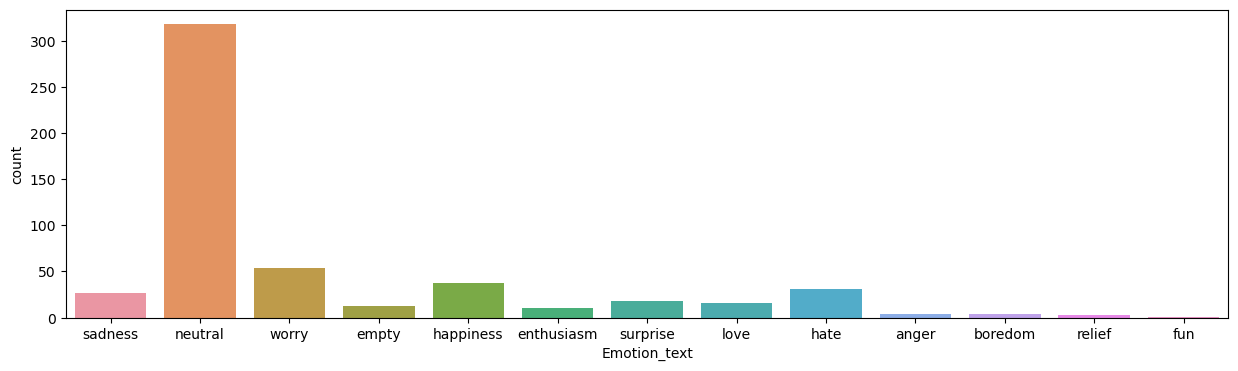

time: 218 ms (started: 2023-04-15 15:47:37 +02:00)


In [183]:
plt.figure(figsize=(15,4))
sns.countplot(x='Emotion_text', data=movie_predict_3);